# pyShaper: Creating SVG files for Shaper Origin in Python

The [Shaper Origin](https://www.shapertools.com/en-us/) is a hand-held CNC router design for woodworkers. The device accepts vector design files in the SVG format. This notebook demonstrates techniques to create SVG design files for the Shaper Origin using a simple Python class.

 The SVG generator has been adapted from from https://www.codedrome.com/svg-library-in-python/.




## Units

A Shaper file is instantiated with a command

    dwg = Shaper(width, height, grid_units)

where ``grid_units`` can be ``'pt'``, ``'px'``, ``'mm'``, ``'cm'``, or ``'in'``. All grid locations passed are specified in the given ``grid_units``.

The plan is to eventually implement ``object_unit`` units for individual objects comprise a drawing. This would enable, for example, specifying a 6mm hole located on a grid specified in inches.

## Basic Shapes

The following shapes and lines are implemented as methods applied to an instance of a Shaper drawing.

| stroke | inside | outside | pocket | guide |
| :-- | :-- | :-- | :-- | :-- |
| ``line`` |  - | - | - | ``guide_line`` 
| ``polyline`` | ``inside_polyline`` | ``outside_polyline`` | ``pocket_polyline`` | - 
| ``rectangle`` | ``inside_rectangle`` | ``outside_rectangle `` | ``pocket_rectangle`` | -
| ``circle`` | ``inside_circle`` | ``outside_circle`` | ``pocket_circle`` | -
| ``ellipse`` | ``inside_ellipse`` | ``outside_ellipse`` | ``pocket_ellipse`` | - 
|- | - | - | - | ``annotation``





In [1]:
from IPython.display import SVG, display

class pyShaper(object):

    scale_factors = {"px": 1, "pt": 1, "mm": 72/25.4, "cm": 72/2.54, "in": 72}

    def __init__(self, width, height, grid_units="px"):
        self.svg_list = []
        self.width = width
        self.height = height
        self.grid_units = grid_units
        self.sf = self.scale_factors[grid_units]
        self.templates = self.__generate_templates()

    def __add_to_svg(self, text):
        self.svg_list.append(str(text))

    def __generate_templates(self):
        templates = {}
        templates["svg_prefix"] = "<svg width='{0:.2f}' height='{1:.2f}' xmlns='http://www.w3.org/2000/svg' " \
            + "version='1.1' xmlns:xlink='http://www.w3.org/1999/xlink' viewbox = '0 0 {2:0.2f} {3:0.2f}'>\n"
        templates["svg_suffix"] = "</svg>"
        templates["circle"] = "<circle fill='{0}' stroke='{1}' stroke-width='{2:0.2f}px' cx='{3:0.2f}' cy='{4:0.2f}' r='{5:0.2f}' />\n"
        templates["line"] = "<line stroke='{}' stroke-width='{}px' x1='{}' y1='{}' x2='{}' y2='{}' />\n"
        templates["rectangle"] = "<rect fill='{0}' stroke='{1}' stroke-width='{2:0.2f}px'  x='{3:0.2f}' y='{4:0.2f}' width='{5:0.2f}' height='{6:0.2f}' rx='{7:0.2f}' />\n"
        templates["text"] = "<text fill='{0}' stroke='{1}' font-size='{2}px' x='{3:0.2f}' y='{4:0.2f}'>{5}</text>\n"
        templates["ellipse"] = "<ellipse fill='{0}'  stroke='{1}' stroke-width='{2:0.2f}px' cx='{3:0.2f}' cy='{4:0.2f}' rx='{5:0.2f}' ry='{6:0.2f}' />\n"
        templates["polyline"] = "<polyline fill='{}' stroke='{}' stroke-width='{}' points='{}' />\n"
        return templates

    # circle

    def circle(self, cx, cy, radius, stroke_width=None):
        sw = 1 if stroke_width is None else self.sf*stroke_width
        self.__add_to_svg(self.templates["circle"].format("none", "#7F7F7F", sw, self.sf*cx, self.sf*cy, self.sf*radius))

    def inside_circle(self, cx, cy, radius):
        self.__add_to_svg(self.templates["circle"].format("#FFFFFF", "#000000", 0, self.sf*cx, self.sf*cy, self.sf*radius))

    def outside_circle(self, cx, cy, radius):
        self.__add_to_svg(self.templates["circle"].format("#000000", "#000000", 0, self.sf*cx, self.sf*cy, self.sf*radius))

    def pocket_circle(self, cx, cy, radius):
        self.__add_to_svg(self.templates["circle"].format("#7F7F7F", "#7F7F7F", 0, self.sf*cx, self.sf*cy, self.sf*radius))

 # ellipse

    def ellipse(self, cx, cy, rx, ry, stroke_width=None):
        sw = 1 if stroke_width is None else self.sf*stroke_width
        self.__add_to_svg(self.templates["ellipse"].format("none", "#7F7F7F", sw, self.sf*cx, self.sf*cy, self.sf*rx, self.sf*ry))

    def inside_ellipse(self, cx, cy, rx, ry):
        self.__add_to_svg(self.templates["ellipse"].format("#FFFFFF", "#000000", 0, self.sf*cx, self.sf*cy, self.sf*rx, self.sf*ry))

    def outside_ellipse(self, cx, cy, rx, ry):
        self.__add_to_svg(self.templates["ellipse"].format("#000000", "#000000", 0, self.sf*cx, self.sf*cy, self.sf*rx, self.sf*ry))

    def pocket_ellispe(self, cx, cy, rx, ry):
        self.__add_to_svg(self.templates["ellipse"].format("#7F7F7F", "#7F7F7F", 0, self.sf*cx, self.sf*cy, self.sf*rx, self.sf*ry))

# rectangle

    def rectangle(self, x, y, width, height, radius=0, stroke_width=None):
        sw = 1 if stroke_width is None else self.sf*stroke_width
        self.__add_to_svg(self.templates["rectangle"].format("none", "#7F7F7F", sw, self.sf*x, self.sf*y, self.sf*width, self.sf*height, self.sf*radius))

    def inside_rectangle(self, x, y, width, height, radius=0):
        self.__add_to_svg(self.templates["rectangle"].format("#FFFFFF", "#000000", 0, self.sf*x, self.sf*y, self.sf*width, self.sf*height, self.sf*radius))

    def outside_rectangle(self, x, y, width, height, radius=0):
        self.__add_to_svg(self.templates["rectangle"].format("#000000", "#000000", 0, self.sf*x, self.sf*y, self.sf*width, self.sf*height, self.sf*radius))

    def pocket_rectangle(self, x, y, width, height, radius=0):
        self.__add_to_svg(self.templates["rectangle"].format("#7F7F7F", "#7F7F7F", 0, self.sf*x, self.sf*y, self.sf*width, self.sf*height, self.sf*radius))

    # line
    
    def line(self, x1, y1, x2, y2, stroke_width=None):
        sw = 1 if stroke_width is None else self.sf*stroke_width
        self.__add_to_svg(self.templates["line"].format("#7F7F7F", sw, self.sf*x1, self.sf*y1, self.sf*x2, self.sf*y2))

    def guide_line(self, x1, y1, x2, y2):
        self.__add_to_svg(self.templates["line"].format("#0068FF", 1, self.sf*x1, self.sf*y1, self.sf*x2, self.sf*y2))

    # polyline

    def __points(self, x, y):
        return " ".join([f"{self.sf*x} {self.sf*y}" for x, y in zip(x, y)])

    def polyline(self, x, y, stroke_width=None):
        sw = 1 if stroke_width is None else self.sf*stroke_width
        self.__add_to_svg(self.templates["polyline"].format("none", "#7F7F7F", sw, self.__points(x, y)))

    def inside_polyline(self, x, y):
        self.__add_to_svg(self.templates["polyline"].format("#FFFFFF", "#000000", 0,  self.__points(x, y)))

    def outside_polyline(self, x, y):
        self.__add_to_svg(self.templates["polyline"].format("#000000", "#000000", 0,  self.__points(x, y)))

    def pocket_polyline(self, x, y):
        self.__add_to_svg(self.templates["polyline"].format("#7F7F7F", "#7F7F7F", 0, self.__points(x, y)))
       
    # text

    def annotation(self, x, y, txt):
        self.__add_to_svg(self.templates["text"].format("#0068FF", "#0068FF", 12, self.sf*x, self.sf*y, txt))

    # svg outputs

    def save(self, path):
        f = open(path, "w+")
        f.write(str(self))
        f.close()

    def to_svg(self):
        return str(self)

    def display(self):
        display(SVG(str(self)))

    def __str__(self):
        prefix = self.templates["svg_prefix"].format(self.sf*self.width, self.sf*self.height, self.sf*self.width, self.sf*self.height)
        body = "    ".join(self.svg_list)
        suffix = self.templates["svg_suffix"]
        return prefix + body + suffix


## "Kondo" boxes

Small open-top boxes to organize drawers are key to the methods of "tidying-up" popularized by Marie Kondo. Suitable boxes can be made quickly from thin sheet goods, like 1/8" or 3mm plywood, using a router table and 45 degree V cutting bit. The following code adapts this technique to the Shaper Origin.

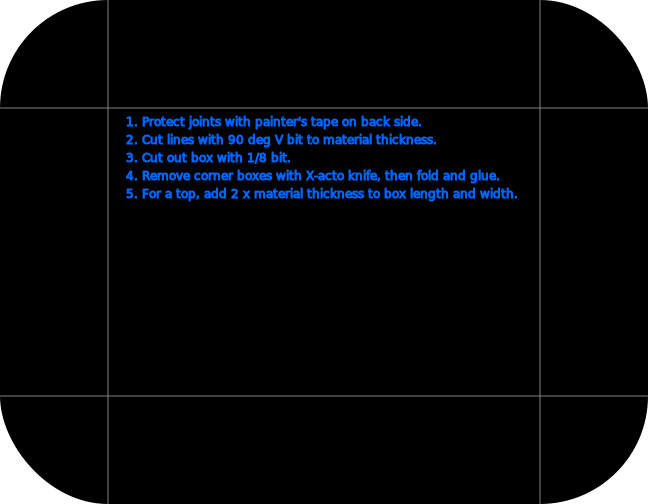

<svg width='648.00' height='504.00' xmlns='http://www.w3.org/2000/svg' version='1.1' xmlns:xlink='http://www.w3.org/1999/xlink' viewbox = '0 0 648.00 504.00'>
<rect fill='#000000' stroke='#000000' stroke-width='0.00px'  x='0.00' y='0.00' width='648.00' height='504.00' rx='108.00' />
    <line stroke='#7F7F7F' stroke-width='1px' x1='0' y1='108.0' x2='648.0' y2='108.0' />
    <line stroke='#7F7F7F' stroke-width='1px' x1='0' y1='396.0' x2='648.0' y2='396.0' />
    <line stroke='#7F7F7F' stroke-width='1px' x1='108.0' y1='0' x2='108.0' y2='504.0' />
    <line stroke='#7F7F7F' stroke-width='1px' x1='540.0' y1='0' x2='540.0' y2='504.0' />
    <text fill='#0068FF' stroke='#0068FF' font-size='12px' x='126.00' y='126.00'>1. Protect joints with painter's tape on back side.</text>
    <text fill='#0068FF' stroke='#0068FF' font-size='12px' x='126.00' y='144.00'>2. Cut lines with 90 deg V bit to material thickness.</text>
    <text fill='#0068FF' stroke='#0068FF' font-size='12px' x='126.00' y='162.0

In [9]:
# Kondo box

def kondo_box(box_length, box_width, box_depth, units="in"):

    # grid dimensions
    width = box_length + 2*box_depth
    height = box_width + 2*box_depth

    # instantiate drawing
    dwg = pyShaper(width, height, units)
    dwg.outside_rectangle(0, 0, width, height, radius=box_depth)

    # router lines
    dwg.line(0, box_depth, width, box_depth)
    dwg.line(0, height - box_depth, width, height - box_depth)
    dwg.line(box_depth, 0, box_depth, height)
    dwg.line(width - box_depth, 0, width - box_depth, height)

    margin = box_depth + 0.25
    dwg.annotation(margin, height/4, "1. Protect joints with painter's tape on back side.")
    dwg.annotation(margin, height/4 + 0.25, "2. Cut lines with 90 deg V bit to material thickness.")
    dwg.annotation(margin, height/4 + 0.50, "3. Cut out box with 1/8 bit.")
    dwg.annotation(margin, height/4 + 0.75, "4. Remove corner boxes with X-acto knife, then fold and glue.")
    dwg.annotation(margin, height/4 + 1.00, "5. For a top, add 2 x material thickness to box length and width.")

    return dwg

dwg = kondo_box(6, 4, 1.5)
dwg.display()
print(dwg)
dwg.save("svg/kondo.svg")

The following cell implements a multi-sided Kondo box. 

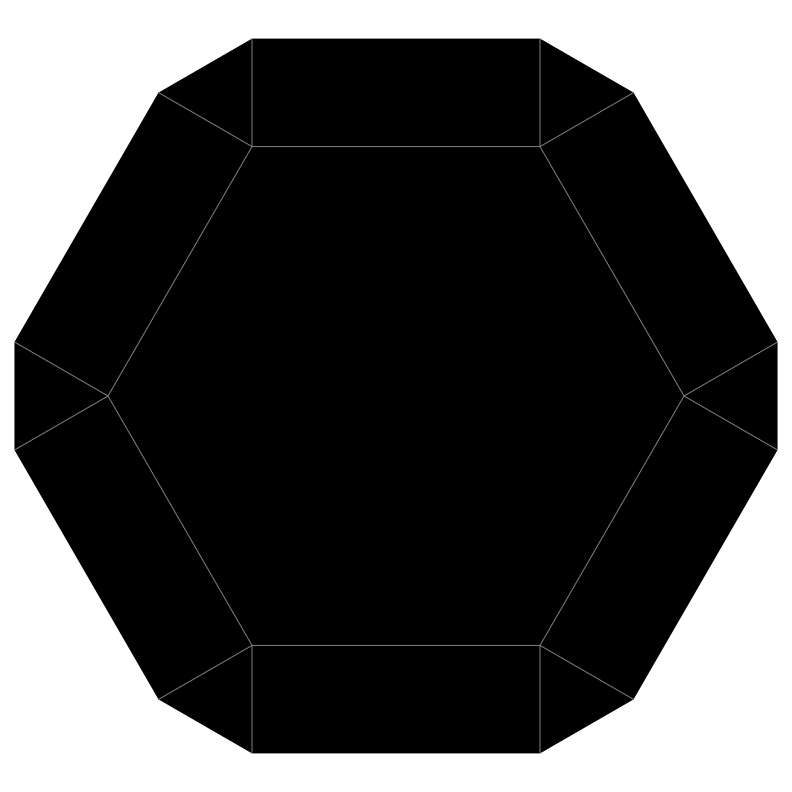

<svg width='792.00' height='792.00' xmlns='http://www.w3.org/2000/svg' version='1.1' xmlns:xlink='http://www.w3.org/1999/xlink' viewbox = '0 0 792.00 792.00'>
<polyline fill='#000000' stroke='#000000' stroke-width='0' points='777.5307436087194 450.0 633.5307436087194 699.4153162899182 540.0 753.4153162899182 252.00000000000006 753.4153162899183 158.46925639128068 699.4153162899183 14.469256391280624 450.00000000000006 14.469256391280608 342.00000000000006 158.4692563912805 92.58468371008178 251.99999999999983 38.58468371008175 540.0 38.584683710081684 633.5307436087194 92.58468371008163 777.5307436087194 341.9999999999999 777.5307436087194 450.0' />
    <polyline fill='none' stroke='#7F7F7F' stroke-width='1' points='684.0 396.0 540.0 645.4153162899182 252.00000000000006 645.4153162899183 108.0 396.00000000000006 251.9999999999999 146.58468371008175 540.0 146.5846837100817 684.0 395.99999999999994' />
    <line stroke='#7F7F7F' stroke-width='1px' x1='684.0' y1='396.0' x2='777.5307436087

In [8]:
import numpy as np

# multi-sided box

# parameters
n = 6
box_diameter = 8
box_depth = 1.5

# grid dimensions
width = box_diameter + 2*box_depth
height = width

# create drawing
dwg = pyShaper(width, height, "in")

# box sides
x = width/2 + box_diameter*np.array([np.cos(2*np.pi*k/n) for k in range(n+1)])/2
y = height/2 + box_diameter*np.array([np.sin(2*np.pi*k/n) for k in range(n+1)])/2
a = [2*np.pi*(k+0.5)/n for k in range(n)]
dx = [box_depth*np.cos(a[k]) for k in range(n)]
dy = [box_depth*np.sin(a[k]) for k in range(n)]
      
xx = []
yy = []
for k in range(n):
    xx += [x[k] + dx[k], x[k+1] + dx[k]]
    yy += [y[k] + dy[k], y[k+1] + dy[k]]
xx.append(xx[0])
yy.append(yy[0])

dwg.outside_polyline(xx, yy)
dwg.polyline(x, y)
for k in range(n):
    dwg.line(x[k], y[k], x[k] + dx[k], y[k] + dy[k])
    dwg.line(x[k+1], y[k+1], x[k+1] + dx[k], y[k+1] + dy[k])

dwg.display()
print(dwg)
dwg.save("svg/hexagon_box.svg")

## Shaper Workstation Shelf

Dimensions from page 26 of workstation manual.

https://assets.shapertools.com/manual/workstation/B000009-A-shaper_workstation_product_manual.pdf

<svg width='846.14' height='325.98' xmlns='http://www.w3.org/2000/svg' version='1.1' xmlns:xlink='http://www.w3.org/1999/xlink' viewbox = '0 0 846.14 325.98'>
<rect fill='#000000' stroke='#000000' stroke-width='0.00px'  x='0.00' y='0.00' width='846.14' height='325.98' rx='17.01' />
    <circle fill='#7F7F7F' stroke='#7F7F7F' stroke-width='0.00px' cx='82.91' cy='32.60' r='18.43' />
    <circle fill='#FFFFFF' stroke='#000000' stroke-width='0.00px' cx='82.91' cy='32.60' r='9.21' />
    <circle fill='#7F7F7F' stroke='#7F7F7F' stroke-width='0.00px' cx='82.91' cy='284.88' r='18.43' />
    <circle fill='#FFFFFF' stroke='#000000' stroke-width='0.00px' cx='82.91' cy='284.88' r='9.21' />
    <circle fill='#7F7F7F' stroke='#7F7F7F' stroke-width='0.00px' cx='763.23' cy='32.60' r='18.43' />
    <circle fill='#FFFFFF' stroke='#000000' stroke-width='0.00px' cx='763.23' cy='32.60' r='9.21' />
    <circle fill='#7F7F7F' stroke='#7F7F7F' stroke-width='0.00px' cx='763.23' cy='284.88' r='18.43' />
    <ci

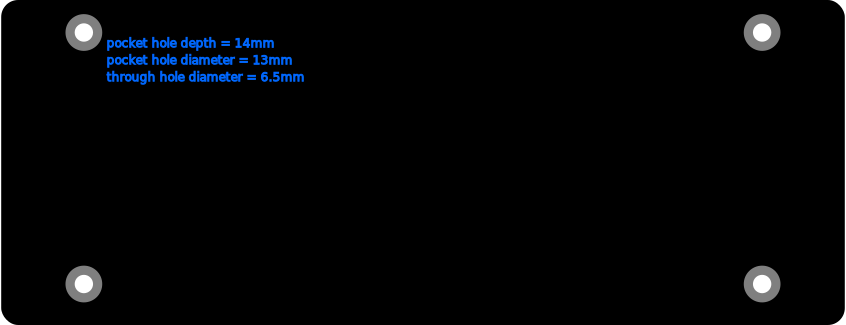

In [14]:
# shelf dimensions (mm)
width = 298.5
height = 115
radius = 6

# screw hole pattern
dx = 240
dy = 89
y_offset = 11.5

# create drawing instance
dwg = pyShaper(width, height, "mm")

# create shelf
dwg.outside_rectangle(0, 0, width, height, radius)

# add screw holes
for xc in [width/2 - dx/2, width/2 + dx/2]:
    for yc in [y_offset, y_offset + dy]:
        dwg.pocket_circle(xc, yc, 13/2)
        dwg.inside_circle(xc, yc, 6.5/2)

# add annotations
dwg.annotation(width/8, height/4, "through hole diameter = 6.5mm")
dwg.annotation(width/8, height/4 - 6, "pocket hole diameter = 13mm")
dwg.annotation(width/8, height/4 - 12, "pocket hole depth = 14mm")

# print and display svg file
print(dwg)
dwg.display()
dwg.save("svg/workstation_shelf.svg")

## Fancy Shaper Workstation Shelf

Sometimes you need a bigger shelf on the Shaper Workstation. This one is bigger, and includes holes for 20mm dogs.

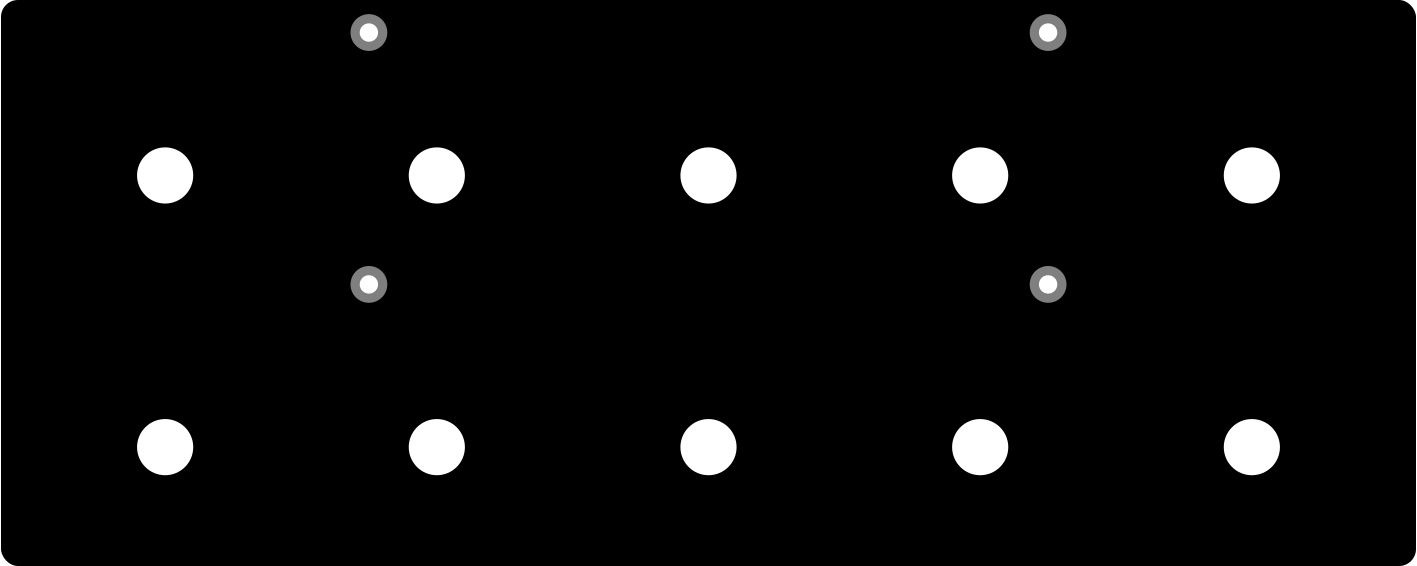

<svg width='1417.32' height='566.93' xmlns='http://www.w3.org/2000/svg' version='1.1' xmlns:xlink='http://www.w3.org/1999/xlink' viewbox = '0 0 1417.32 566.93'>
<rect fill='#000000' stroke='#000000' stroke-width='0.00px'  x='0.00' y='0.00' width='1417.32' height='566.93' rx='17.01' />
    <circle fill='#7F7F7F' stroke='#7F7F7F' stroke-width='0.00px' cx='368.50' cy='32.60' r='18.43' />
    <circle fill='#FFFFFF' stroke='#000000' stroke-width='0.00px' cx='368.50' cy='32.60' r='9.21' />
    <circle fill='#7F7F7F' stroke='#7F7F7F' stroke-width='0.00px' cx='368.50' cy='284.88' r='18.43' />
    <circle fill='#FFFFFF' stroke='#000000' stroke-width='0.00px' cx='368.50' cy='284.88' r='9.21' />
    <circle fill='#7F7F7F' stroke='#7F7F7F' stroke-width='0.00px' cx='1048.82' cy='32.60' r='18.43' />
    <circle fill='#FFFFFF' stroke='#000000' stroke-width='0.00px' cx='1048.82' cy='32.60' r='9.21' />
    <circle fill='#7F7F7F' stroke='#7F7F7F' stroke-width='0.00px' cx='1048.82' cy='284.88' r='18.43' 

In [15]:
# shelf dimensions (mm)
width = 500
height = 200
corner = 6

# place screw holes
dx = 240
dy = 89

# holes
hole_diameter = 19.85
hole_spacing = 96
hole_offset = 10
J = 5
K = 2

# center of screw whole pattern
xc = width/2
yc = 11.5 + dy/2

def place_screw_hole(x, y):
    d.pocket_circle(x, y, 13/2)
    d.inside_circle(x, y, 6.5/2)

d = pyShaper(width, height,  "mm")
d.outside_rectangle(0, 0, width, height, corner)
place_screw_hole(xc - dx/2, yc - dy/2)
place_screw_hole(xc - dx/2, yc + dy/2)
place_screw_hole(xc + dx/2, yc - dy/2)
place_screw_hole(xc + dx/2, yc + dy/2)

# place holes
xoffset = (width - (J-1)*hole_spacing)/2
yoffset = hole_offset + (height - (K-1)*hole_spacing)/2
for j in range(J):
    for k in range(K):
        xh = xoffset + j*hole_spacing
        yh = yoffset + k*hole_spacing
        d.inside_circle(xh, yh, hole_diameter/2)

# set number of pixels per geometry unit
d.display()
d.save("svg/workstation_shelf_fancy.svg")
print(d)

## MFT Table

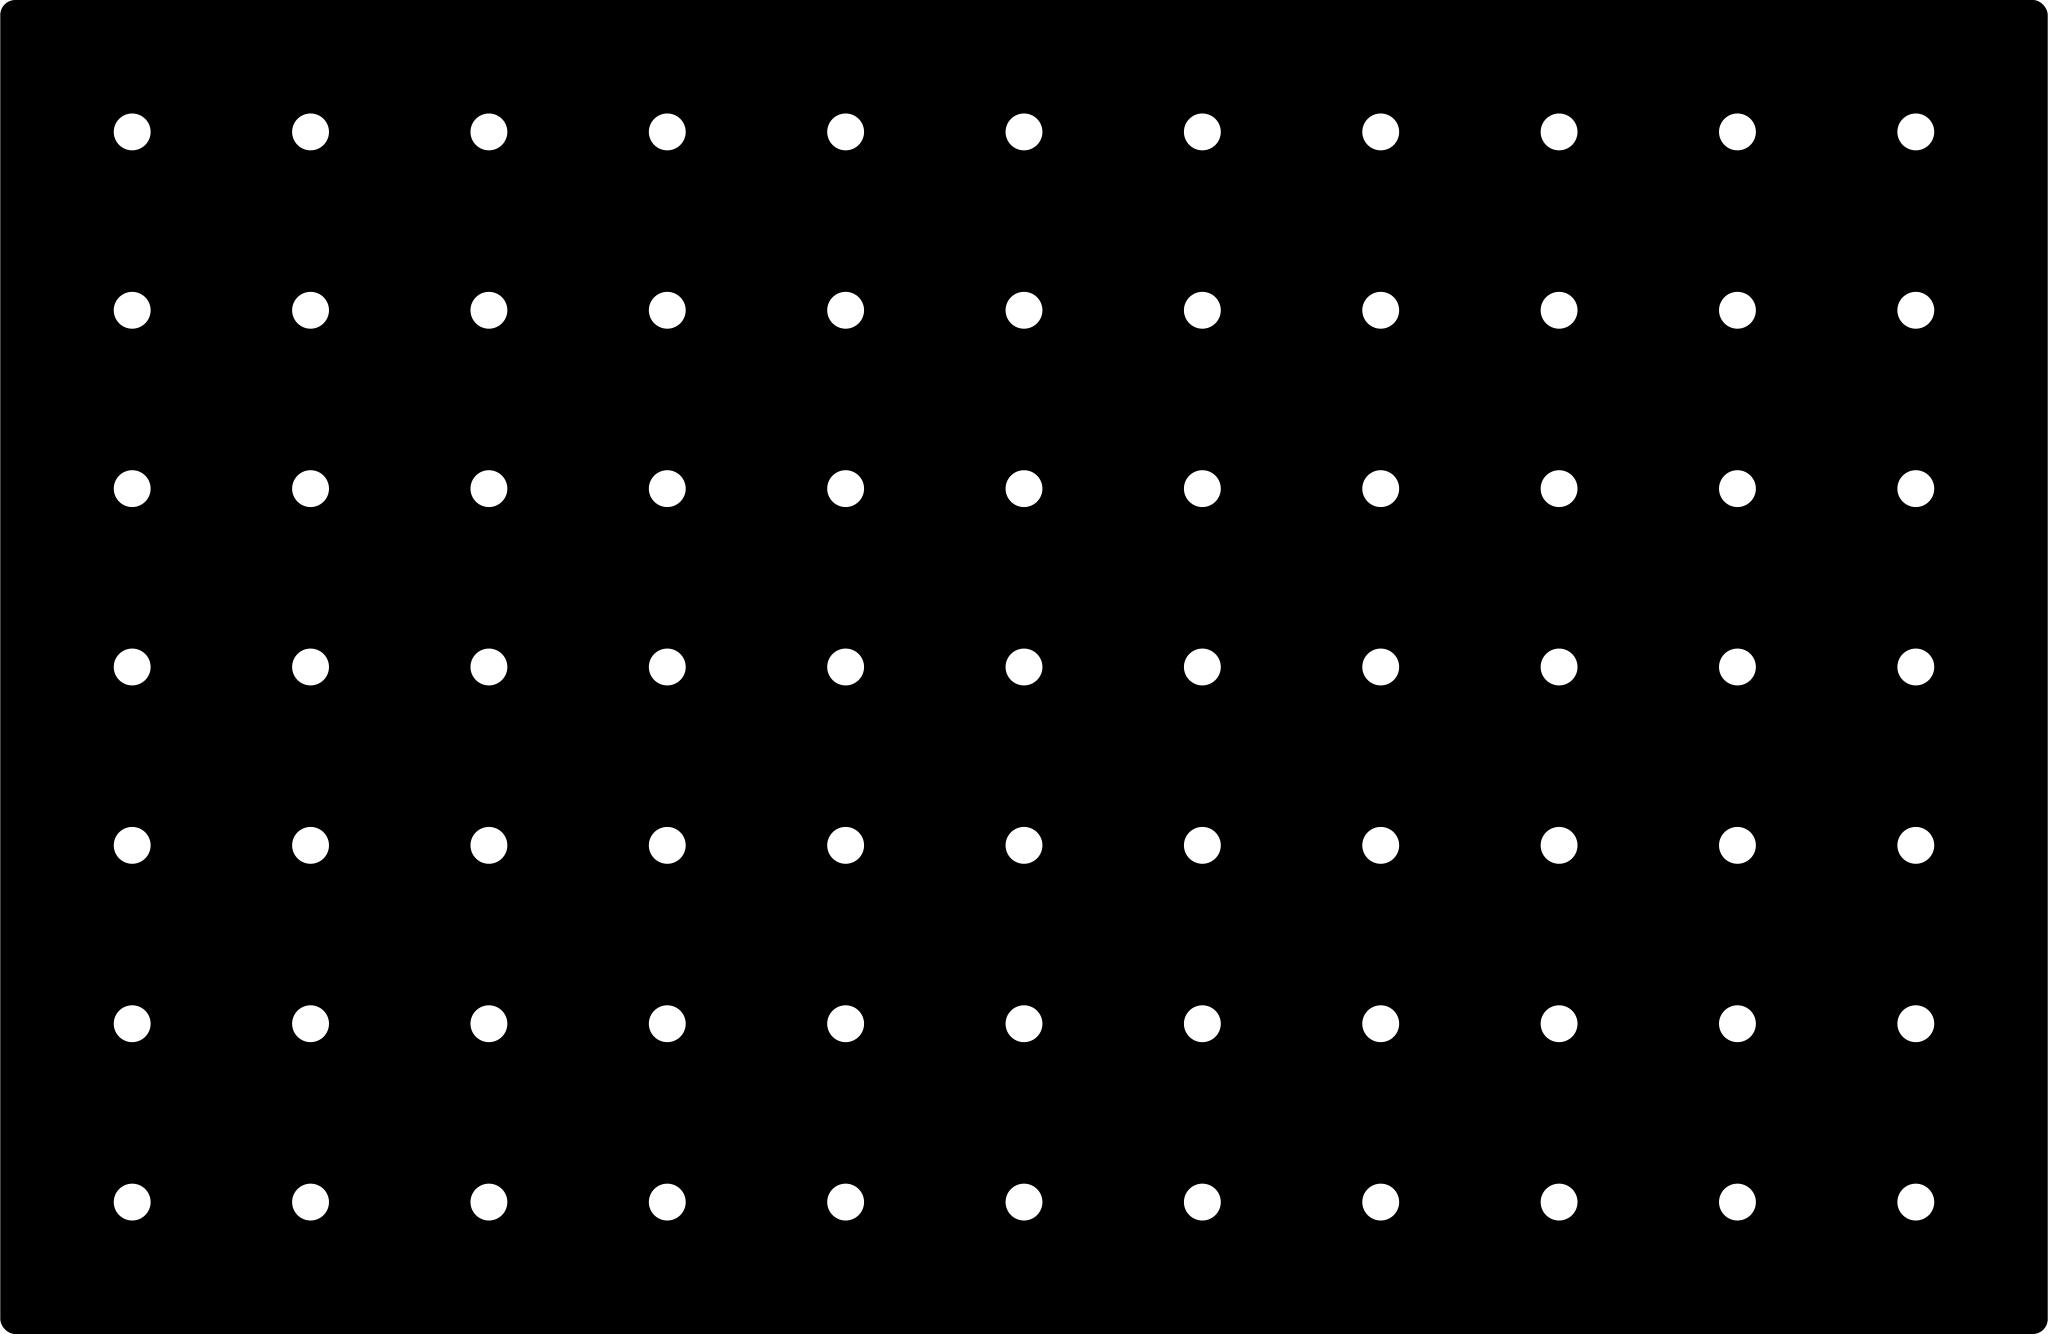

In [10]:
# MFT dimensions (mm)
width = 1102
height = 718
edge_margin = 16
hole_diameter = 19.85 
hole_spacing = 96.0
corner_radius = edge_margin/2

# hole pattern
J = 11
K = 7

# find offsets that center the hole pattern on the table
xoffset = (width - (J-1)*hole_spacing)/2
yoffset = (height - (K-1)*hole_spacing)/2

d = pyShaper(width, height, "mm")
d.outside_rectangle(0, 0, width, height, corner_radius)
for j in range(J):
    for k in range(K):
        x = xoffset + j*hole_spacing
        y = yoffset + k*hole_spacing
        d.inside_circle(x, y, hole_diameter/2)

d.display()
d.save("svg/mft.svg")

## Oval Photo Frame

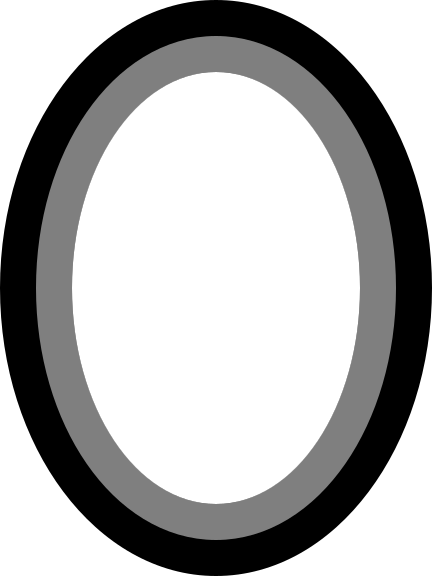

<svg width='432.00' height='576.00' xmlns='http://www.w3.org/2000/svg' version='1.1' xmlns:xlink='http://www.w3.org/1999/xlink' viewbox = '0 0 432.00 576.00'>
<ellipse fill='#000000'  stroke='#000000' stroke-width='0.00px' cx='216.00' cy='288.00' rx='216.00' ry='288.00' />
    <ellipse fill='none'  stroke='#7F7F7F' stroke-width='36.00px' cx='216.00' cy='288.00' rx='162.00' ry='234.00' />
    <ellipse fill='#FFFFFF'  stroke='#000000' stroke-width='0.00px' cx='216.00' cy='288.00' rx='144.00' ry='216.00' />
</svg>


In [19]:
width = 6
height = 8

import numpy as np

cx = width/2
cy = height/2

rx = width/2
ry = height/2

dwg = pyShaper(width, height, "in")
dwg.outside_ellipse(cx, cy, rx, ry)
dwg.ellipse(cx, cy, rx-.75, ry-.75, stroke_width=.5)
dwg.inside_ellipse(cx, cy, rx-1, ry-1)
dwg.display()
print(dwg)
dwg.save("svg/oval_frame.svg")